In [1]:
import requests

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import requests
def get_temp_data(dt='2019-10-10'):
    url = f"https://api.data.gov.sg/v1/environment/air-temperature?date={dt}"
    resp = requests.get(url)
    return resp.json()

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
from typing import Dict
import pandas as pd

def choose_station(temp_data: Dict, station_id: str):
    output = []
    for item in temp_data['items']:
        ts = item['timestamp']
        try:
            temperature = [temp['value'] for temp in item['readings'] if temp['station_id'] == station_id][0]
        except IndexError:
            pass
        output.append({
            'time': ts,
            'temp': temperature
        })
    return pd.DataFrame(output)

In [7]:
output

[{'time': '2019-10-10T00:01:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:02:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:03:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:04:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:05:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:06:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:07:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:08:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:09:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:10:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:11:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:12:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:13:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:14:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:15:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:16:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:17:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:18:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:19:

In [9]:
import pandas as pd

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='time'>

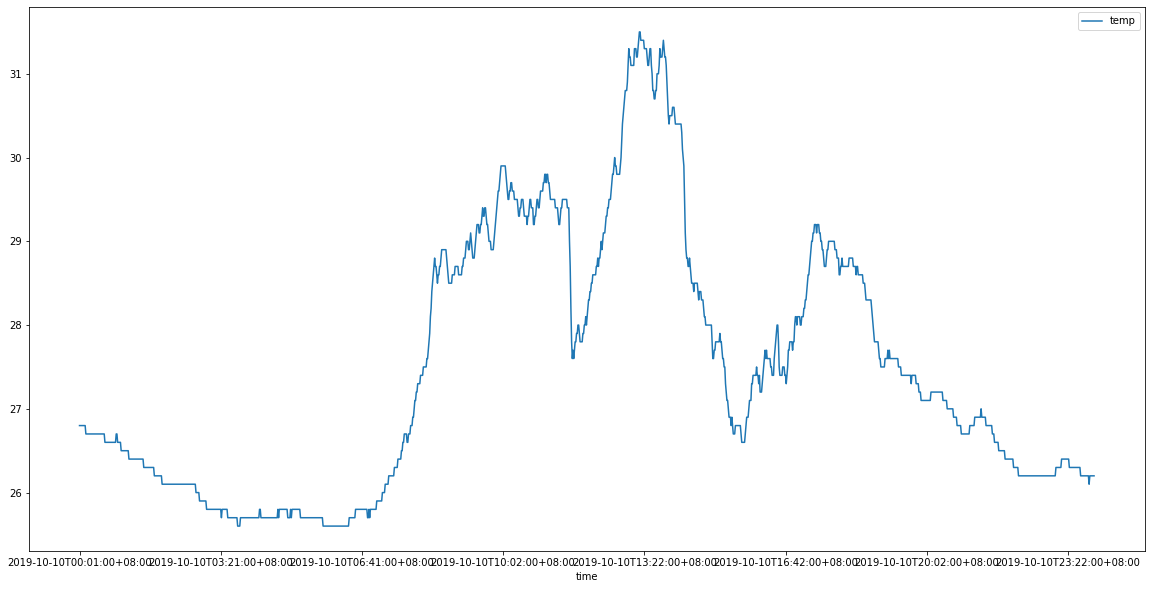

In [10]:
pd.DataFrame(output).plot(x="time", figsize=(20, 10))

In [1]:
catalog

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
catalog.list()

['temp_plot',
 'raw_temp',
 'station_temperature',
 'parameters',
 'params:station_id']

In [3]:
catalog.load('station_temperature')

2020-08-05 00:45:25,832 - kedro.io.data_catalog - INFO - Loading data from `station_temperature` (CSVDataSet)...


,time,temp
0,2019-10-10T00:01:00+08:00,26.8
1,2019-10-10T00:02:00+08:00,26.8
2,2019-10-10T00:03:00+08:00,26.8
3,2019-10-10T00:04:00+08:00,26.8
4,2019-10-10T00:05:00+08:00,26.8
...,...,...
1433,2019-10-10T23:55:00+08:00,26.2
1434,2019-10-10T23:56:00+08:00,26.2
1435,2019-10-10T23:57:00+08:00,26.2
1436,2019-10-10T23:58:00+08:00,26.2


In [4]:
df = catalog.load('station_temperature')
df['hour'] = df['time'].apply(lambda x: x[:13])

2020-08-05 00:47:14,324 - kedro.io.data_catalog - INFO - Loading data from `station_temperature` (CSVDataSet)...


/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='hour'>

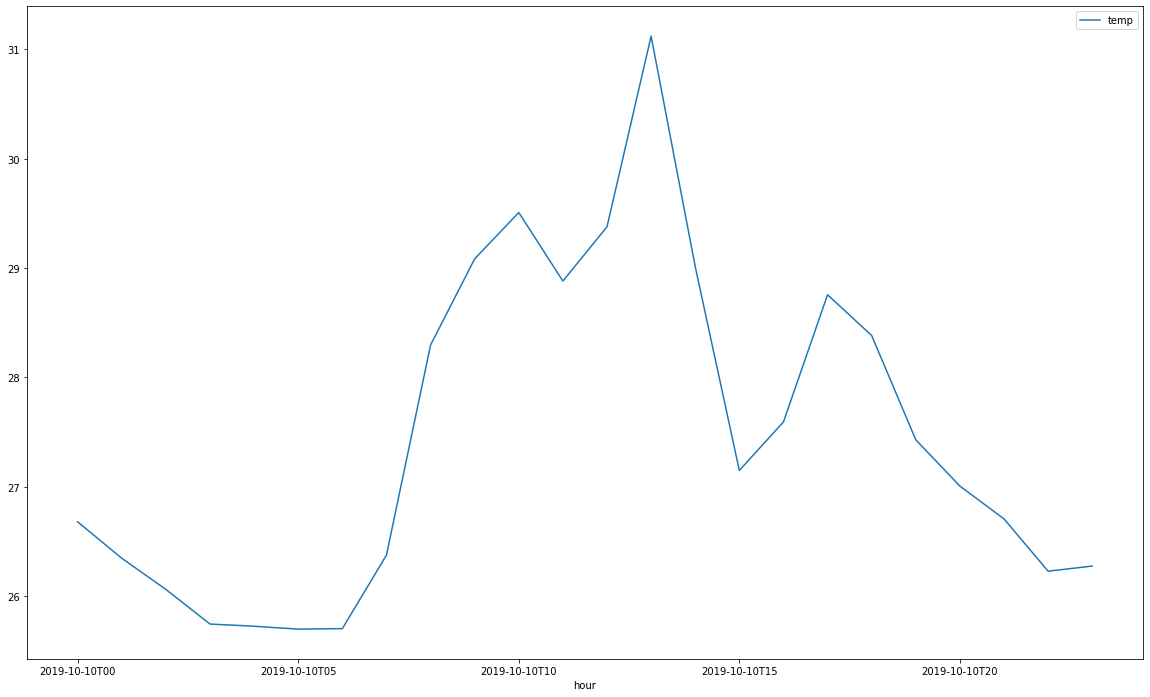

In [6]:
df.groupby(['hour']).mean().plot(figsize=(20, 12))